In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint
import random

In [108]:
L=[5, 10 , 20, 50]
LENGTH=L[3]
POPULATION=200 
NEXT_GEN_RATE=2/10
NEXT_GEN_SIZE= int (NEXT_GEN_RATE * POPULATION)
MUTATION_RATE=0.05
MUTATION_SIZE= int (MUTATION_RATE * LENGTH)
Mut_rate = [MUTATION_RATE for i in range(LENGTH)]
# Crossover Points
CP1=randint(1,LENGTH-2)
CP2=randint(CP1+1,LENGTH-1)

print (CP1, CP2, MUTATION_SIZE)

32 45 2


In [75]:
def Evaluation(Chromos, Fitness):
    for j in range (POPULATION):
        count = 0
        fitness = 0
        for x in Chromos[j]:
            if x==0: count = 0
            else   : count += 1
            if count == 2: fitness +=1
        Fitness[j]=fitness
def FitnessProportional(Fitness, Prob_Fit):
    Sum_Fit=sum(Fitness)
    
    for i in range (POPULATION):
        Prob_Fit[i]=Fitness[i]/Sum_Fit

# Selecting an index according to the given Probabilities        
def weighted_choice(weights):
    totals = []
    running_total = 0

    for w in weights:
        running_total += w
        totals.append(running_total)

    rnd = random.random() * running_total
    for i, total in enumerate(totals):
        if rnd < total:
            return i              

In [109]:
# Initialize Population
Chromos  = [[randint(0,1) for i in range(LENGTH)] for x in range(POPULATION)]

Max_Fitness = 0
Generations=0

# Target = 16#int (LENGTH/ 2)
Target = 16 #int (LENGTH/ 2)
#Target =20000#700 #(POPULATION * (LENGTH/ 2) )/2

# for generation in range (0,1):
while  Max_Fitness< Target:
    # Initialize Fitness, Prob_Fit and Next_Gen
    Fitness  = [0 for i in range(POPULATION)]
    Prob_Fit = [0 for i in range(POPULATION)]
    Parents_indexes  = [0 for i in range (NEXT_GEN_SIZE)]
    Parents  = [0 for i in range (NEXT_GEN_SIZE)]
    Next_Gen = [[0 for i in range(LENGTH)] for k in range (NEXT_GEN_SIZE)]

    Max_Gen_Fitness=0
    

    # Evaluating Population using Fittness Function 
    Evaluation(Chromos, Fitness)
    # print(Chromos[1], "  ", Fitness, "\n")

    # Assign Probability wrt Fitness Proportional 
    FitnessProportional(Fitness, Prob_Fit)

    for i in range (NEXT_GEN_SIZE):
        index = weighted_choice(Prob_Fit)
        Parents_indexes[i] = index 
        Parents[i] = Chromos[index]

    # Crossover
    for i in range (0, NEXT_GEN_SIZE, 2):
        Next_Gen[i][0:CP1]       = Parents[i][0:CP1]
        Next_Gen[i][CP1:CP2]     = Parents[i+1][CP1:CP2]
        Next_Gen[i][CP2:LENGTH]  = Parents[i][CP2:LENGTH]

        Next_Gen[i+1][0:CP1]     = Parents[i+1][0:CP1]
        Next_Gen[i+1][CP1:CP2]   = Parents[i][CP1:CP2]
        Next_Gen[i+1][CP2:LENGTH]= Parents[i+1][CP2:LENGTH]

    #print (Parents, "\n CP:", CP1, CP2, "\n", Next_Gen)

    # Mutation
#     for i in range (0, NEXT_GEN_SIZE):
#         for j in range (0, MUTATION_SIZE):
#             mut_index = weighted_choice(Mut_rate)
#             Parents[i][mut_index] = (Parents[i][mut_index]+1)%2 # Flip the bit

#             # Modify directly the Chromos list 
#             Chromos[Parents_indexes[i]][mut_index] = Parents[i][mut_index]

    replaced_mutants = 0
    while replaced_mutants < NEXT_GEN_SIZE :
        rand_index= randint(0, POPULATION-1)
        parent=False
        for j in range (NEXT_GEN_SIZE):
            if rand_index == Parents_indexes[j]:
                parent=True
        if parent == False:
            for m in range (0, MUTATION_SIZE):
                mut_index = weighted_choice(Mut_rate)
                Chromos[rand_index][mut_index] = (Chromos[rand_index][mut_index]+1)%2 # Flip the bit
            replaced_mutants+=1

    # Replace random non-parents with offspring
    replaced = 0
    while replaced < NEXT_GEN_SIZE :
        rand_index= randint(0, POPULATION-1)
        parent=False
        for j in range (NEXT_GEN_SIZE):
            if rand_index == Parents_indexes[j]:
                parent=True
        if parent == False:
            #print (rand_index)
            Chromos[rand_index] = Next_Gen[replaced]
            replaced+=1
    
    Generations+=1
    Max_Gen_Fitness = max(Fitness)
    
    if Max_Gen_Fitness > Max_Fitness:
        Max_Fitness = Max_Gen_Fitness
    
    if Generations > 5000:
        break
            
    if Generations == 1:
        print("First gen :", Max_Fitness)
    if Generations % 500 ==0:
        print("Next  Gen :", Max_Fitness)
        print("Next  Gen :", Generations)

print("Final Solution Score :", Max_Fitness, "\nGens :", Generations  ) 

First gen : 10
Next  Gen : 14
Next  Gen : 500
Next  Gen : 14
Next  Gen : 1000
Next  Gen : 14
Next  Gen : 1500
Next  Gen : 14
Next  Gen : 2000
Next  Gen : 14
Next  Gen : 2500
Next  Gen : 14
Next  Gen : 3000
Next  Gen : 14
Next  Gen : 3500
Next  Gen : 14
Next  Gen : 4000
Next  Gen : 15
Next  Gen : 4500
Next  Gen : 15
Next  Gen : 5000
Final Solution Score : 15 
Gens : 5001


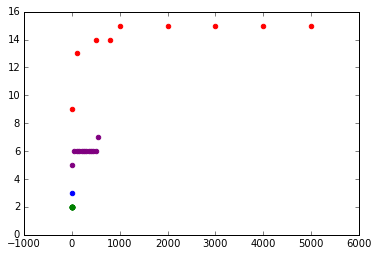

In [63]:
def plot_result(X1,X2,Y1,Y2):
    _ = plt.scatter(x=X1, y=X2, color='g')
    _ = plt.scatter(x=Y1, y=Y2, color='b')
    _ = plt.scatter(x=Z1, y=Z2, color='purple')
    _ = plt.scatter(x=W1, y=W2, color='red')
    
X1=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
X2=[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Y1=[1]
Y2=[3]
Z1=[1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 540]
Z2=[5,  6,   6,   6,   6,   6,   6,   6,   6,   6,  6,     7]
W1=[1, 100,  500, 800, 1000, 2000, 3000, 4000, 5000]
W2=[9,  13,   14,   14,  15,   15,  15,    15,   15]
plot_result(X1,X2, Y1, Y2)
  